<center><h1>3-3 특성 공학과 규제</h1></center>

1. 데이터 리스트
- 훈련 및 테스트 셋: https://bit.ly/perch_csv
- 타겟 데이터: http://bit.ly/perch_data

2. 사용할 ML 패키지 : 사이킷 런 설치<br>
pip install scikit-learn<br>

3. 필요 패키지 
- Pandas: pip install pandas<br>

4. 다중 회귀(Multiple Regression) 이란?<br>
여러개의 특성을 사용한 선형 회귀<br>

5. 특성 공학(Feature Engineering)?<br>
기존의 특성을 사용해 새로운 특성을 뽑아내는 작업<br>

6. 판다스(Pandas)?<br>
유명한 데이터 분석 라이브러리 입니다. 데이터프레임(dataframe)은 판단스의 핵심 데이터 구조
- 패키지 설치 : pip install pandas

<h3>다중 회귀</h3>

In [4]:
import pandas as pd
import numpy as np

# 판다스 데이터 프레임에 저장
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
# 훈련 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)

In [8]:
# 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공합니다. 이런 클래스를 변환기(transformer)라고 부릅니다.
from sklearn.preprocessing import PolynomialFeatures

# Sample로 2,3을 적용해 보겠습니다
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# 절편에 곱해지는 1을 무시
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [13]:
# 실제 train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

# 특성이 어떻게 만들어졌는지 확인하는 방법
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [14]:
# 실제 test_input에 적용
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [15]:
#다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9903183436982126


In [16]:
# 테스트 점수 확인
print(lr.score(test_poly,test_target))

0.9714559911594185


In [18]:
# 특성을 추가, 5제곱까지 특성을 추가
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [20]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9999999999987383


In [21]:
# 테스트 점수를 확인
print(lr.score(test_poly,test_target))

-144.40541626710538


<h3>규제</h3> 
규제(regularization)는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말합니다

In [22]:
# 규제를 적용하기 전에 계수의 값의 크기가 서로 많이 다르면 공정하게 제어되지 않음. 규제를 적용하기 전에 먼저 정규화가 필요함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

<h3>릿지 회귀</h3>
계수를 제곱한 값을 기준으로 규제를 적용

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [24]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


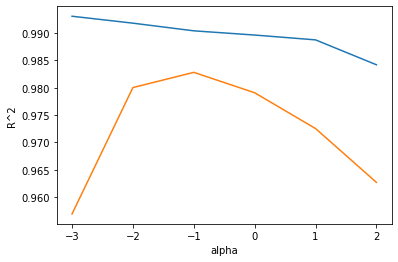

In [28]:
# 릿지와 라쏘모델을 사용할 때 규제의 양을 임의로 조정할 수 있음, alpha 매개변수로 규제의 강도를 조절합니다. 
# alpha 값이 크면 규제 강도가 세지므로 계수의 값을 줄여 조금더 과소 적합되도록 유도합니다. 
# alpha 값이 작으면 계수를 줄이는 역할이 줄어들므로 과대적합될 가능성이 큽니다.
# alpha 값을 찾는 방법은 alpha 값에 대한 R2 값의 그래프를 그려 보는 것 입니다.
import matplotlib.pyplot as plt
train_score = []
test_score = []

# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
# alpha_list에 있는 6개의 값을 동일한 간격으로 나태내기 위해 로그 함수로 바꾸어 지수로 표현, 즉 0.001 은 -3
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


In [29]:
# alpha 값을 0.1로 하여 최종 모델을 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386906


7. 하이퍼파라미터(hyperparameter)? alpha 값은 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값입니다. 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 합니다.

<h3>라쏘 회귀</h3>
계수를 절대 값을 기준으로 규제를 적용

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421884


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957795222, tolerance: 518.2793833333334
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345403758, tolerance: 518.2793833333334
  positive)


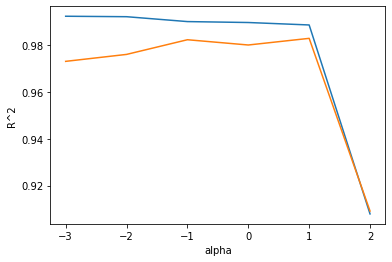

In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행, 충분히 늘리기 위해 1000 지정
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [36]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [37]:
print(np.sum(lasso.coef_==0))
# 55개 특성을 주입했지만 라쏘 모델이 적용한 특성은 15개 입니다.

40
